In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
class player:
    possible_bdays = pd.date_range(start='01-01-2020', end='12-31-2020')
    def __init__(self, p_id):
        self.p_id = p_id
        self.bday = random.choice(player.possible_bdays)
        self.valuation = round((int(self.bday.month) + int(self.bday.day))*0.10, 2) # value in dollars
        self.bid = random.choice(np.arange(0, self.valuation+0.01, 0.01))
        self.win = False
    def __str__(self):
        return str(self.p_id)+"|"+str(self.valuation)+"|"+str(self.bid)

In [3]:
class fpa:
    def __new__(cls, a_id, num_players):
        if num_players % 6 != 0:
            print("error: num_players must be divisible by 6")
            return None
        else:
            instance = super().__new__(cls)
            return instance
    def __init__(self, a_id, num_players):
        self.a_id = a_id
        self.num_players = num_players
        self.players = self._spawn()
    def _spawn(self):
        print("spawning players")
        plist = {}
        for i in range(self.num_players):
            plist[i] = player(i)
        return plist
    def _compbids(self,p_id_list):
        winning_bid = -1
        losing_bids = []
        for p_id in p_id_list:
            if winning_bid == -1:
                winning_bid = self.players[p_id].bid
                self.players[p_id].win = True
            elif self.players[p_id].bid > winning_bid:
                winning_bid = self.players[p_id].bid
                self.players[p_id].win = True
                losing_bids.append(winning_bid)
            else:
                losing_bids.append(self.players[p_id].bid)
                self.players[p_id].win = False
        return winning_bid, losing_bids
    def pair_auction(self):
        print("conducting pair auction")
        # create pairs of people
        pairs = zip(*(iter(random.sample(self.players.keys(), self.num_players)),) * 2)
        # for every pair compare bid price
        all_winning_bids = []
        all_losing_bids = []
        for pair in pairs:
            this_winning_bid, this_losing_bid = self._compbids(pair)
            all_winning_bids.append(this_winning_bid)
            all_losing_bids.append(this_losing_bid)
        # return the winning bid prices and losing bid prices
        return all_winning_bids, [x for y in all_losing_bids for x in y]
    def triple_auction(self):
        print("conducting triple auction")
        # create triples of people
        triples = zip(*(iter(random.sample(self.players.keys(), self.num_players)),) * 2)
        # for every triple compare bid price
        all_winning_bids = []
        all_losing_bids = []
        for triple in triples:
            this_winning_bid, this_losing_bid = self._compbids(triple)
            all_winning_bids.append(this_winning_bid)
            all_losing_bids.append(this_losing_bid)
        # return a dictionary of winning bid prices and losing bid prices
        return all_winning_bids, [x for y in all_losing_bids for x in y]
    def all_bids(self):
        print("All bids: ", end = " ")
        for p_id in self.players:
            print(self.players[p_id].bid, end = " ")
    def win_loss(self):
        winners = []
        losers = []
        for i in range(self.num_players):
            if self.players[i].win:
                winners.append([i, round(100*self.players[i].bid/self.players[i].valuation,1),int(self.players[i].win)])
            else:
                losers.append([i, round(100*self.players[i].bid/self.players[i].valuation,1),int(self.players[i].win)])
        return winners, losers

In [4]:
num_players = 600
a = fpa(1, num_players)

spawning players


In [5]:
pair_auction1 = a.pair_auction()

conducting pair auction


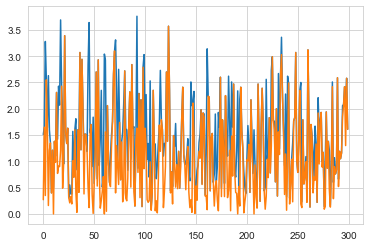

In [6]:
plt.plot(range(int(num_players/2)),pair_auction1[0])
plt.plot(range(int(num_players/2)),pair_auction1[1])

(array([27., 32., 16., 17., 13., 12.,  6., 10.,  6.,  7.]),
 array([ 0.  ,  9.92, 19.84, 29.76, 39.68, 49.6 , 59.52, 69.44, 79.36,
        89.28, 99.2 ]),
 <a list of 10 Patch objects>)

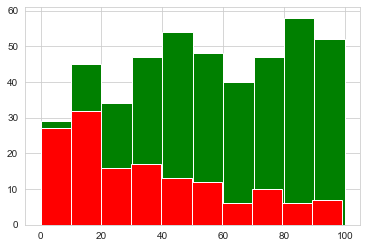

In [7]:
winners, losers = a.win_loss()
plt.hist([x[1] for x in winners], color='green')
plt.hist([x[1] for x in losers], color='red')

In [8]:
triple_auction1 = a.triple_auction()

conducting triple auction


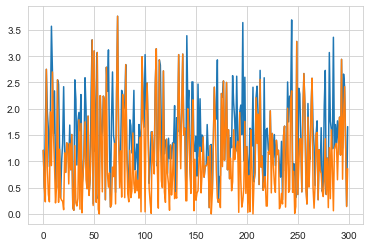

In [9]:
plt.plot(range(int(num_players/2)),triple_auction1[0])
plt.plot(range(int(num_players/2)),triple_auction1[1])

(array([27., 29., 21., 19., 18., 15.,  8., 10.,  3.,  7.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

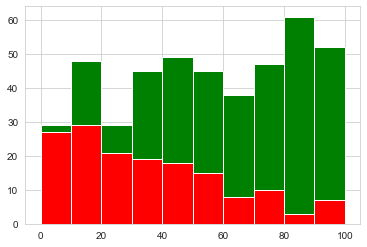

In [10]:
winners, losers = a.win_loss()
plt.hist([x[1] for x in winners], color='green')
plt.hist([x[1] for x in losers], color='red')